<a href="https://colab.research.google.com/github/skysh00/generative-ai-for-beginners/blob/main/mysql_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# 本題目標：簡易計算：全班數學平均，數學最高分，最低分
https://www.1keydata.com/tw/sql/sqlfunctions.html

https://www.1keydata.com/tw/sql/sql-as.html

---
#1.練習1：安裝mysql的python的驅動程式碼

In [ ]:
!pip install pymysql

In [ ]:
#如何知道這個google colab的網址 = ？
import requests
r = requests.get('https://api.ipify.org')
print(r.text)

34.85.221.106


---
#2.練習2：建立連線Azure mysql資料庫物件conn
讀取Azure mySQL的firstdb資料庫

#連線資料庫指令
import pymysql

conn = pymysql.connect(host="",user="", password="", db="")

#會員user1
密碼：123@Ntut

資料庫：firstdb

Azure主機：ccw-mysql.mysql.database.azure.com



In [ ]:
#連線Azure mysql資料庫指令
import pymysql
conn = pymysql.connect(
      host="ccw-mysql.mysql.database.azure.com",
      user="user1",
      password="123@Ntut",
      database="firstdb")

---
#3.練習3：讀取【經管2a】


In [ ]:
import pandas as pd
sql = "select * from 經管2a"
df0 = pd.read_sql_query(sql, conn)
df0

<ipython-input-46-05287d58f767>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df0 = pd.read_sql_query(sql, conn)


,學號,姓名,性別,中文,英文,數學
0,9096001,彼德,男,80,60,70
1,9096002,麥克,男,45,99,69
2,9096003,瑪麗,女,70,88,99
3,9096004,約翰,男,88,88,44
4,9096005,傑克,男,99,60,66
5,9096006,蘇珊,女,100,66,56
6,9096007,珍妮弗,女,90,90,90


---
#4.練習4：計算全班『數學』平均
#(1).新增欄位：數學平均
方法：select 運算(舊欄位) as 新欄位

#(2).計算：數學平均
SQL語法：select avg(數學) as 數學平均 from 經管2a

#(3).程式碼
import pandas as pd

df = pd.read_sql_query("select avg(數學) as 數學平均 from 經管2a", conn)

In [ ]:
import pandas as pd
sql = "select avg(數學) as 數學平均 from 經管2a"
df = pd.read_sql_query(sql, conn)
df

<ipython-input-47-fd48797dd929>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn)


,數學平均
0,70.5714


---
# 5.練習5：計算全班數學最高分

#(1).計算：數學最高
SQL語法：select max(數學) as 數學最高分 from 經管2a


In [ ]:
import pandas as pd
sql = "select max(數學) as 數學最高分 from 經管2a"
df = pd.read_sql_query(sql, conn)
df

<ipython-input-48-deb6ab371048>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn)


,數學最高分
0,99


---
# 6.練習6：計算全班『數學最高分，英文最高分』

#(1).計算：『數學最高分，英文最高分』
SQL語法：

select

max(數學) as 數學最高分,

max(英文) as 英文最高分

from 經管2a


In [ ]:
#計算全班『數學最高分，英文最高分』
sql = "\
select max(數學) 數學最高分, \
	   max(英文) 英文最高分 \
from 經管2a;"
df = pd.read_sql_query(sql, conn)
df

<ipython-input-49-dbd1c4ba9585>:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn)


,數學最高分,英文最高分
0,99,99


In [ ]:
#計算全班『中文平均，英文最高分，數學平均』
sql = "\
select avg(中文) 中文平均, \
		avg(數學) 數學平均, \
		avg(英文) 英文平均 \
from 經管2a;"
df = pd.read_sql_query(sql, conn)
df

<ipython-input-51-d59c1b5b1055>:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn)


,中文平均,數學平均,英文平均
0,81.7143,70.5714,78.7143


---
# 7.練習7：計算全班『數學分數總和』

#(1).計算：『數學分數總和』
SQL語法：

select

sum(數學) as 數學總和

from 經管2a


In [ ]:
#計算全班『數學總和』
sql = "select sum(數學) as 數學總和 from 經管2a"
df = pd.read_sql_query(sql, conn)
df

<ipython-input-52-bedb1dea8c02>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn)


,數學總和
0,494.0


---
# 8.練習8：計算『全班人數』

#(1).計算人數：方法1：count(欄位)

#(2).計算全部筆數：方法2：count(*)

SQL語法：

select

count(姓名) as 人數

from 經管2a


In [ ]:
#(1).計算人數：方法1：count(欄位)
sql = "select count(姓名) as 全班人數 from 經管2a"
df = pd.read_sql_query(sql,conn)
df

<ipython-input-53-d1f0291a58e4>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql,conn)


,全班人數
0,7


In [ ]:
#(2).計算全部筆數：方法2：count(*)
sql = "select count(*) as 全班人數 from 經管2a"
df = pd.read_sql_query(sql,conn)
df

<ipython-input-54-b024d94eda94>:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql,conn)


,全班人數
0,7


---
# 10.練習10：關閉連線

In [ ]:
#關閉連線
#conn.close()

---
# 20.結論：常用的聚合函數（aggregate，計算函數）
#**注意：聚合函數，作用方向是『垂直方向』**

#AVG(column_name)：計算變數的平均數

#COUNT(column_name)：計算變數的「非」遺漏值數

#COUNT(*)：計算資料表的觀測值數

#MAX(column_name)：計算變數的最大值

#MIN(column_name)：計算變數的最小值

#SUM(column_name)：計算變數的加總

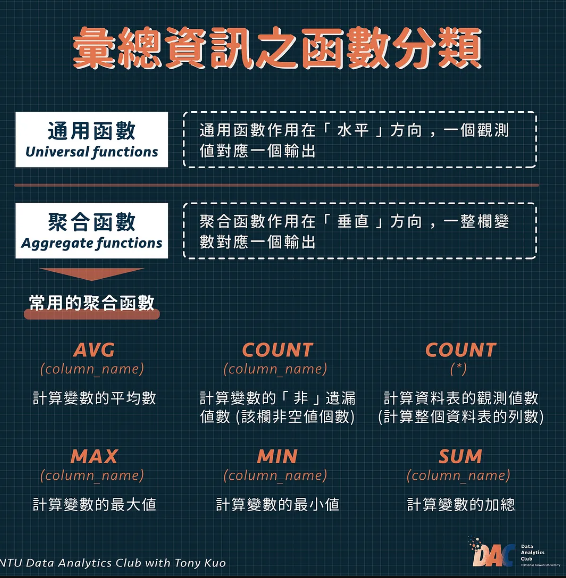